In [105]:
import networkx as nx
import pickle
import numpy as np
from pathlib import Path
import pandas as pd
import os

import sys
sys.path.append("../src")
from data_component import DataComponent
from graph_utils import *

In [106]:
# ~2 min
data = DataComponent(real_data="Brexit")
data.pre_compute_neighboring()

In [107]:
CREATE = True

data_folder = "../data/processed/"
betweenness_path = os.path.join(data_folder, "brexit_betweenness_centrality.pkl")

if not os.path.exists(betweenness_path) or CREATE:
    betweenness_centrality = nx.betweenness_centrality(data.get_graph())
    with open(betweenness_path, "wb") as f:
        pickle.dump(betweenness_centrality, f)
else:
    with open(betweenness_path, "rb") as f:
        betweenness_centrality = pickle.load(f)

Opinions stats 
mean: 0.5483296179151699
std: 0.40122325342413656
min: 0.0
max: 1.0


Text(0, 0.5, 'occurrences')

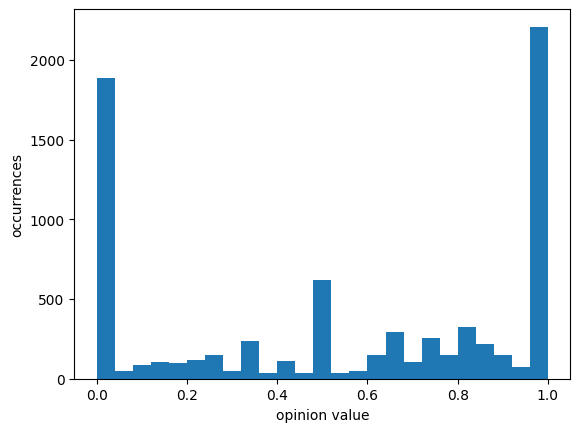

In [66]:
opinions = data.get_opinions()
print(f'Opinions stats \nmean: {opinions.mean()}\nstd: {opinions.std()}\nmin: {opinions.min()}\nmax: {opinions.max()}')

import matplotlib.pyplot as plt
_ = plt.hist(opinions, bins=25, range=[0,1])
plt.xlabel('opinion value')
plt.ylabel('occurrences')

In [67]:
G_brexit = data.get_graph()

In [73]:
nx.write_gexf(G_brexit, os.path.join(data_folder, "brexit_graph.gexf"))

In [68]:
G_brexit.number_of_nodes()

7589

In [77]:
G_brexit.number_of_edges()

532459

In [84]:
opinions

array([0.5  , 0.   , 0.   , ..., 0.   , 0.625, 1.   ])

In [97]:
edges_to_remove = []
gaps = []
edges = G_brexit.edges()
for edge in edges:
    if i == j:
        continue
    gaps.append(abs(opinions[i]-opinions[j]))
    i, j = edge
    if (not (opinions[i] >= 0.5 and opinions[j] >= 0.5)) and (not (opinions[i] < 0.5 and opinions[j] < 0.5)):
        edges_to_remove.append(edge)

In [100]:
len(edges_to_remove)/len(edges)

0.28203110474233695

In [101]:
G_brexit.remove_edges_from(edges_to_remove)

In [102]:
G_brexit.number_of_nodes()

7589

In [103]:
G_brexit.number_of_edges()

382289

In [104]:
nx.write_gexf(G_brexit, os.path.join(data_folder, "brexit_graph_after_removal.gexf"))

In [70]:
LLM_pos_node_id_dict = {}

In [71]:
LLM_positions = ["echo-low", "echo-high", "comm-largest", "comm-smallest", "central"]

for LLM_pos in LLM_positions:

    if LLM_pos == "echo-low":
        llm_node_id = LLM_in_echochamber(data, "low")
    elif LLM_pos == "echo-high":
        llm_node_id = LLM_in_echochamber(data, "high")
    elif LLM_pos == "comm-largest":
        llm_node_id = LLM_in_comm(data, "largest")
    elif LLM_pos == "comm-smallest":
        llm_node_id = LLM_in_comm(data, "smallest")
    elif LLM_pos == "central":
        llm_node_id = LLM_central(data, betweenness_centrality=betweenness_centrality)

    LLM_pos_node_id_dict[LLM_pos] = llm_node_id

In [72]:
LLM_pos_node_id_dict

{'echo-low': 1,
 'echo-high': 0,
 'comm-largest': 1,
 'comm-smallest': 0,
 'central': 4426}

In [7]:
base_folder = Path("/mnt/nas/cinus/SocialAIGym/data/raw/Referendum")

g = nx.read_edgelist(base_folder / Path("ita_referendum_04_edgelist.txt"), nodetype=int, create_using=nx.DiGraph)
print(f"g.number_of_nodes(): {g.number_of_nodes():_}, g.number_of_edges(): {g.number_of_edges():_}")


with open(base_folder / Path("ita_referendum_04_node2stance.pkl"), "rb") as f_handle:
    node2stance = pickle.load(f_handle)
    print(f"len(node2stance): {len(node2stance):_}")

with open(base_folder / Path("ita_referendum_04_username2index.pkl"), "rb") as f_handle:
    username2index = pickle.load(f_handle)
    print(f"len(username2index): {len(username2index):_}")

with open(base_folder / Path("ita_referendum_04_propagations_and_polarities.pkl"), "rb") as f_handle:
    propagations, polarities = pickle.load(f_handle)
    print(f"len(propagations): {len(propagations):_}")
    print(f"len(polarities): {len(polarities):_}")

tweets_texts = pd.read_pickle(base_folder / Path("ita_referendum_04_tweets_texts.pkl"))
print(f"len(tweets_texts): {len(tweets_texts):_}")

with open(base_folder / Path("ita_referendum_04_tweets_ids.pkl"), "rb") as f_handle:
    tweets_ids = pickle.load(f_handle)
    print(f"len(tweets_ids): {len(tweets_ids):_}")



g.number_of_nodes(): 2_894, g.number_of_edges(): 161_888
len(node2stance): 2_894
len(username2index): 2_894
len(propagations): 41_001
len(polarities): 41_001
len(tweets_texts): 41_001
len(tweets_ids): 41_001
